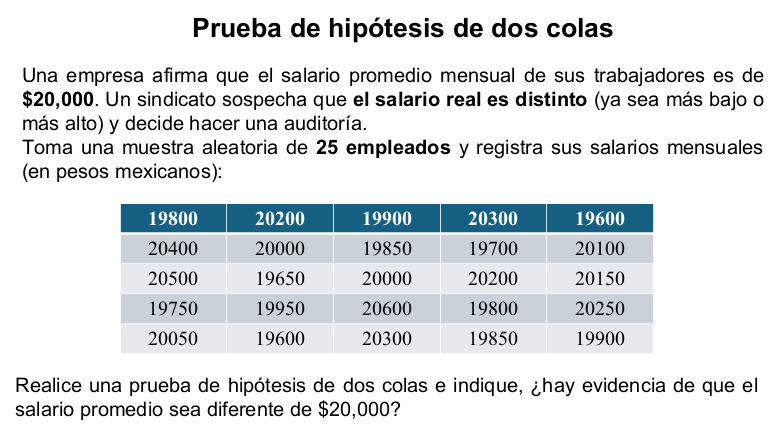

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu = 20000$$
$$H_a - \mu \neq 20000$$

La media de los datos proporcionados en la tabla es de
$$\bar{X}=\frac{19800+20200+19900+20300+19600+20400+20000+19850+19700+20100+20500+19650+20000+20200+20150+19750+19950+20600+19800+20250+20050+19600+20300+19850+19900}{25}=20016$$

esto es mayor al promedio real que deberia ser de $\mu=20000$.

La desviacion estadar es de
$$s=\sqrt\frac{(19800-20016)^2+(20200-20016)^2+(19900-20016)^2+(20300-20016)^2+(19600-20016)^2+(20400-20016)^2+(20000-20016)^2+(19850-20016)^2+(19700-20016)^2+(20100-20016)^2+(20500-20016)^2+(19650-20016)^2+(20000-20016)^2+(20200-20016)^2+(20150-20016)^2+(19750-20016)^2+(19950-20016)^2+(20600-20016)^2+(19800-20016)^2+(20250-20016)^2+(20050-20016)^2+(19600-20016)^2+(20300-20016)^2+(19850-20016)^2+(19900-20016)^2}{24}$$
$$=\sqrt\frac{46656+33856+13456+80656+173056+147456+256+27556+99856+7056+234256+133956+256+33856+17956+70756+4356+341056+46656+54756+1156+173056+80656+27556+13456}{24}$$
$$=\sqrt\frac{1863600}{24}=278.6575$$

El estadistico t:
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{20016-20000}{\frac{278.6575}{\sqrt{25}}}≈0.2871$$

El valor critico de t para 24 grados de libertad y nivel de confianza al 95% para una prueba de dos colas es $\pm$2.0639.

No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que el salario promedio es diferente de $20,000. Es decir, con base en la muestra, no se puede rechazar la afirmación de la empresa.

In [2]:
import numpy as np
from scipy import stats

datos = [19800, 20200, 19900, 20300, 19600, 20400, 20000, 19850, 19700, 20100,
         20500, 19650, 20000, 20200, 20150, 19750, 19950, 20600, 19800, 20250,
         20050, 19600, 20300, 19850, 19900]

# Prueba t de una muestra
t_stat, p_valor = stats.ttest_1samp(datos, 20000)

print(f"Media: {np.mean(datos):.2f} mL")
print(f"Desviación estándar: {np.std(datos, ddof=1):.2f} mL")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_valor:.3f}")

if p_valor > 0.05:
    print("Conclusión: No se rechaza H₀ (Media = $20000)")
else:
    print("Conclusión: Se rechaza H₀")

Media: 20016.00 mL
Desviación estándar: 278.66 mL
Estadístico t: 0.287
Valor p: 0.777
Conclusión: No se rechaza H₀ (Media = $20000)


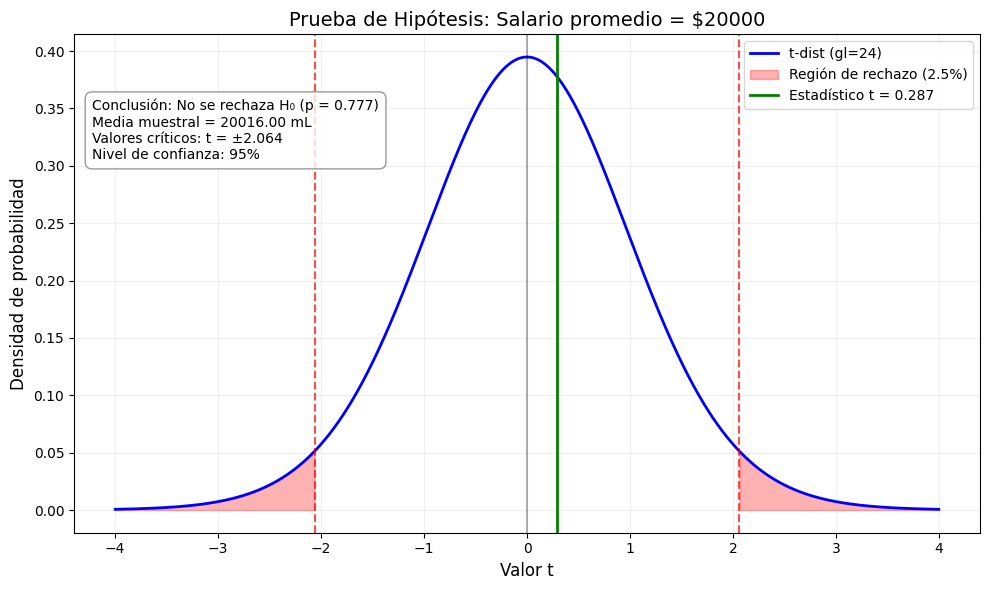

In [3]:
import matplotlib.pyplot as plt

# Datos y cálculos
datos = [19800, 20200, 19900, 20300, 19600, 20400, 20000, 19850, 19700, 20100,
         20500, 19650, 20000, 20200, 20150, 19750, 19950, 20600, 19800, 20250,
         20050, 19600, 20300, 19850, 19900]
n = len(datos)
gl = n - 1  # grados de libertad
media_muestral = np.mean(datos)
t_stat = (media_muestral - 20000) / (np.std(datos, ddof=1) / np.sqrt(n))
p_valor = stats.t.sf(np.abs(t_stat), gl) * 2  # Valor p bilateral

# Parámetros de la distribución t
t_critico = stats.t.ppf(0.975, gl)  # Valor crítico (95% confianza)
x = np.linspace(-4, 4, 20000)
y = stats.t.pdf(x, gl)

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label=f't-dist (gl={gl})')

# Regiones críticas
plt.fill_between(x, y, where=(x <= -t_critico), color='red', alpha=0.3, label='Región de rechazo (2.5%)')
plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3)
plt.axvline(x=-t_critico, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=t_critico, color='r', linestyle='--', alpha=0.7)

# Estadístico t y media
plt.axvline(x=t_stat, color='g', linestyle='-', linewidth=2, label=f'Estadístico t = {t_stat:.3f}')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)  # Línea en μ=0

# Anotaciones
plt.title('Prueba de Hipótesis: Salario promedio = $20000', fontsize=14)
plt.xlabel('Valor t', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)

# Texto informativo
info_text = (
    f'Conclusión: No se rechaza H₀ (p = {p_valor:.3f})\n'
    f'Media muestral = {media_muestral:.2f} mL\n'
    f'Valores críticos: t = ±{t_critico:.3f}\n'
    f'Nivel de confianza: 95%'
)
plt.annotate(info_text, xy=(0.02, 0.75), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()